In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms

from PIL import Image

In [ ]:
#8 MIN TO RUN
def load_data():
    # Load training images and labels
    train_images = []
    train_labels = []
    train_dir = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/train/images'
    train_label_file = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/train/labels'
    for filename in os.listdir(train_dir):
        img = Image.open(os.path.join(train_dir, filename))
        img = img.resize((224, 224)) # Resize to a common size
        img_arr = np.array(img)
        train_images.append(img_arr)

        label_filename = os.path.splitext(filename)[0] + '.txt'
        label_file_path = os.path.join(train_label_file, label_filename)
        with open(label_file_path, 'r') as f:
            text = f.read().strip()
            # Map "no_mask" to 0, "mask" to 1, and "improper_mask" to 2
            if text == "1":
                label = 1
            elif text == "0":
                label = 0
            elif text == "2":
                label = 2
            train_labels.append(label)

    # Load testing images and labels
    test_images = []
    test_labels = []
    test_dir = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/test/images'
    test_label_dir = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/test/labels'
    for filename in os.listdir(test_dir):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.resize((224, 224)) # Resize to a common size
        img_arr = np.array(img)
        test_images.append(img_arr)

        label_filename = os.path.splitext(filename)[0] + '.txt'
        label_file_path = os.path.join(test_label_dir, label_filename)
        with open(label_file_path, 'r') as f:
            text = f.read().strip()
            # Map "no_mask" to 0, "mask" to 1, and "improper_mask" to 2
            if text == "1":
                label = 1
            elif text == "0":
                label = 0
            elif text == "2":
                label = 2
            test_labels.append(label)

    # Convert the lists to numpy arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    return train_images, test_images, train_labels, test_labels

# Load the dataset
X_train, X_test, y_train, y_test = load_data()

print("Number of training images: ", len(X_train))
print("Number of training labels: ", len(y_train))
print("Number of testing images: ", len(X_test))
print("Number of testing labels: ", len(y_test))

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Print information about the dataset
print("Number of training images: ", X_train.shape[0])
print("Number of training labels: ", y_train.shape[0])
print("Number of testing images: ", X_test.shape[0])
print("Number of testing labels: ", y_test.shape[0])

Number of training images:  2394
Number of training labels:  2394
Number of testing images:  458
Number of testing labels:  458
Shape of X_train:  (2394, 224, 224, 3)
Shape of y_train:  (2394,)
Shape of X_test:  (458, 224, 224, 3)
Shape of y_test:  (458,)
Number of training images:  2394
Number of training labels:  2394
Number of testing images:  458
Number of testing labels:  458


This code loads a dataset of images and labels for training and testing machine-learning models to detect whether an individual is wearing a mask correctly, incorrectly, or not at all. The images and their corresponding labels are stored in separate directories, and the code resizes them to a standard size of 224 by 224 pixels. The code then converts the text labels to numeric values of 0, 1, or 2 for "no mask", "mask", and "improper mask", respectively. The data is transformed into NumPy arrays and returned as the output of the load_data function. The code also displays information about the dataset, such as the number of training and testing images and labels and the shape of the NumPy arrays.

In [ ]:
# Calculate class distribution of training set
unique, counts = np.unique(y_train, return_counts=True) # Get unique labels and their counts
print("Class distribution of training set: ")
for i in range(len(unique)): # Loop through each unique label
    print("Class {}: {} samples".format(unique[i], counts[i])) # Print the label and its count

# Calculate class distribution of testing set
unique, counts = np.unique(y_test, return_counts=True) # Get unique labels and their counts
print("Class distribution of testing set: ")
for i in range(len(unique)): # Loop through each unique label
    print("Class {}: {} samples".format(unique[i], counts[i])) # Print the label and its count


Class distribution of training set: 
Class 0: 376 samples
Class 1: 1940 samples
Class 2: 78 samples
Class distribution of testing set: 
Class 0: 51 samples
Class 1: 388 samples
Class 2: 19 samples


The purpose of this code is to determine the class distribution of the dataset. The numpy.unique() function obtains an array of unique labels and their respective counts in the training and testing sets. The code then loops through each label and prints its count for both sets. This output provides valuable info into the dataset's class distribution, which can be used to evaluate the performance of a machine-learning model trained on this data.

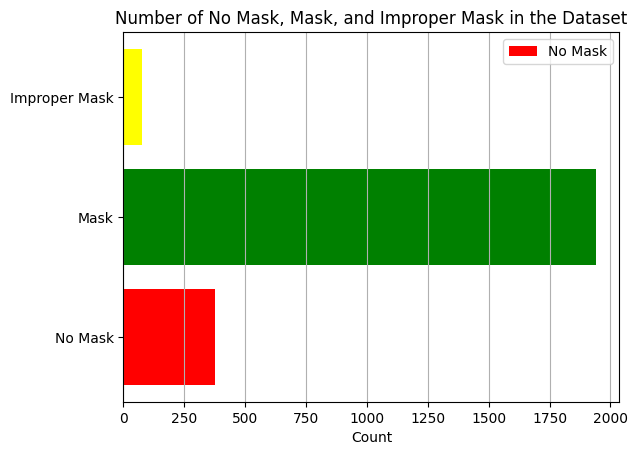

In [ ]:
# Count the number of no mask, mask, and improper mask in the dataset
no_mask_count = sum(y_train == 0)
mask_count = sum(y_train == 1)
improper_mask_count = sum(y_train == 2)

# Create a horizontal bar chart with colour-coded bars
labels = ['No Mask', 'Mask', 'Improper Mask']
counts = [no_mask_count, mask_count, improper_mask_count]
colors = ['red', 'green', 'yellow']

plt.barh(labels, counts, color=colors)
plt.title('Number of No Mask, Mask, and Improper Mask in the Dataset')
plt.xlabel('Count')
plt.grid(True, axis='x')

# Add a legend to explain the colours used in the chart
legend = plt.legend(loc='best', labels=['No Mask', 'Mask', 'Improper Mask'])

plt.show()

This code generates a bar chart to display the count of images belonging to three classes in a dataset: "no mask", "mask", and "improper mask".

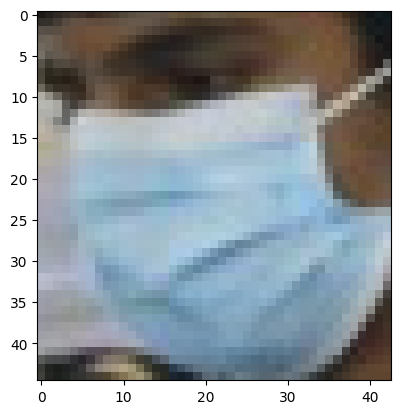

In [ ]:
# Load an image
img = Image.open('/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/test/images/image_2394.jpeg')

# Display the image
plt.imshow(img)
plt.show()

This code loads an image from test images and loads it.

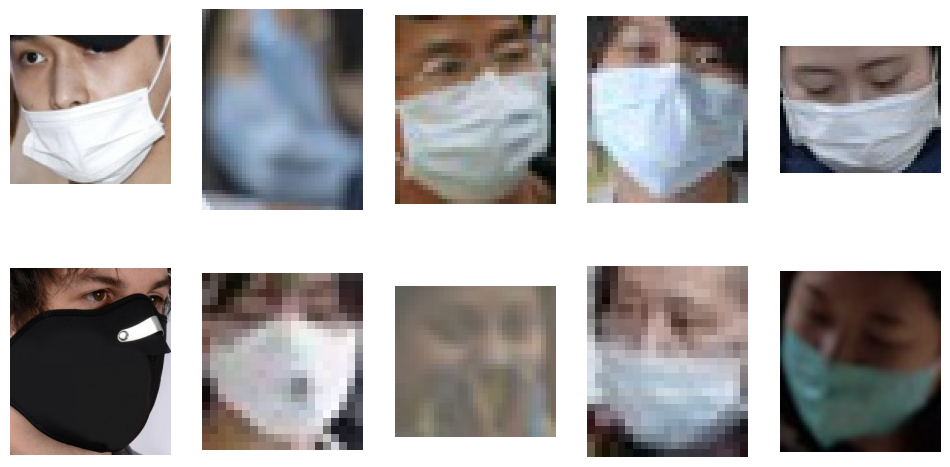

In [ ]:
import os
import matplotlib.pyplot as plt

# Load 10 images from the directory
image_dir = ('/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/test/images')
image_files = os.listdir(image_dir)[:10]

# Plot the images in a 2x5 grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(image_files):
        img = plt.imread(os.path.join(image_dir, image_files[i]))
        ax.imshow(img)
        ax.axis('off')
    else:
        ax.axis('off')
plt.show()

This code allows us to view a sample of ten images from a directory using the Matplotlib library. The images are loaded from the directory using plt.imread() function and then displayed in a 2x5 grid using the ax.imshow() function. This quick and efficient visualisation using a small subset of the images helped us to check if the images were correctly loaded and confirmed their suitability for use in a machine-learning model.


In [ ]:
# All the file paths
train_images_path = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/train/images'
train_labels_path = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/train/labels'
test_images_path = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/test/images'
test_labels_path = '/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/test/labels'

# Count number of files in each folder
train_images_count = len(os.listdir(train_images_path))
train_labels_count = len(os.listdir(train_labels_path))
test_images_count = len(os.listdir(test_images_path))
test_labels_count = len(os.listdir(test_labels_path))

print("Number of train images:", train_images_count)
print("Number of train labels:", train_labels_count)
print("Number of test images:", test_images_count)
print("Number of test labels:", test_labels_count)

Number of train images: 2394
Number of train labels: 2394
Number of test images: 458
Number of test labels: 458


This code helps define the file paths for the training and testing images and labels in the dataset. It then uses the os.listdir() function to get a list of filenames for each folder and the len() function to count the number of files in each list. By doing so, it was possible to quickly verify the size of the dataset and ensure that the number of images and labels matched, which was an important check.

# Taking A Look At HOG

<ipython-input-31-9b1563b564d2>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(sample_images[i], orientations=orientations,


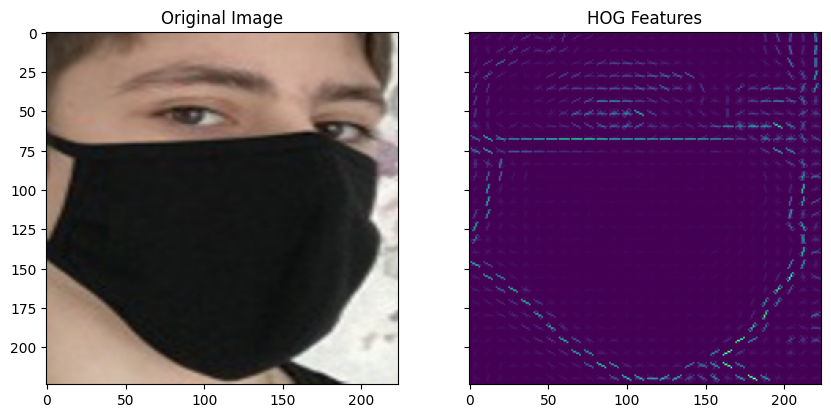

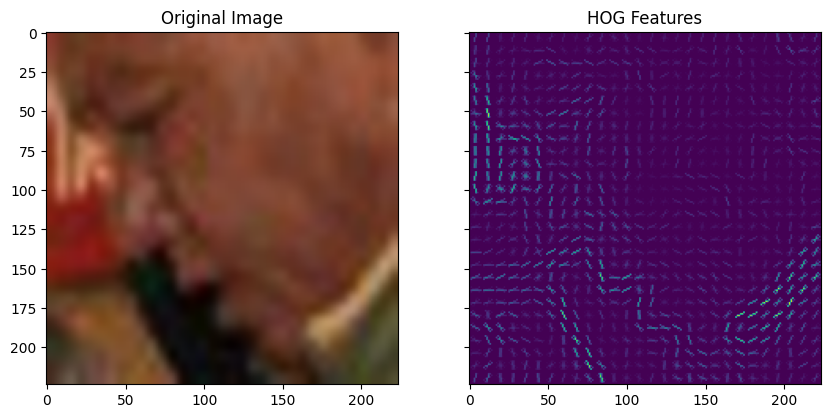

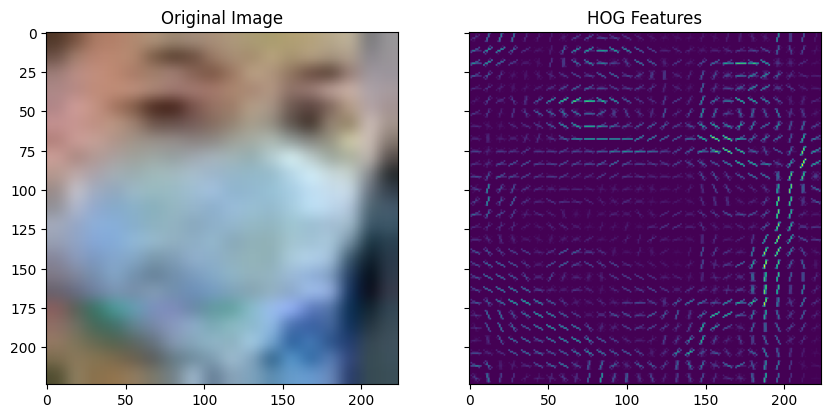

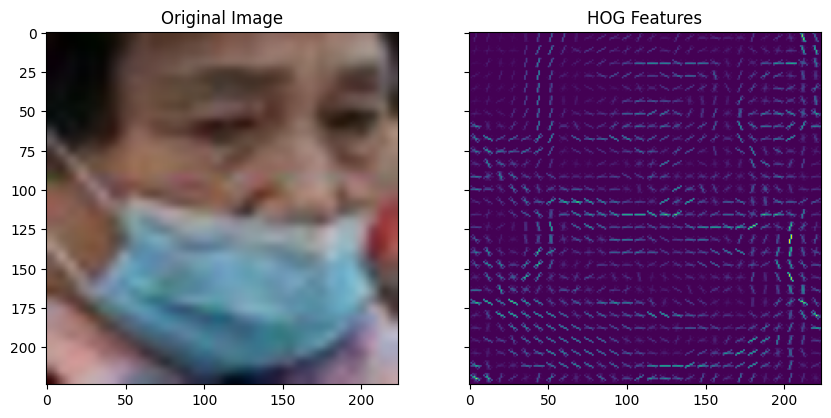

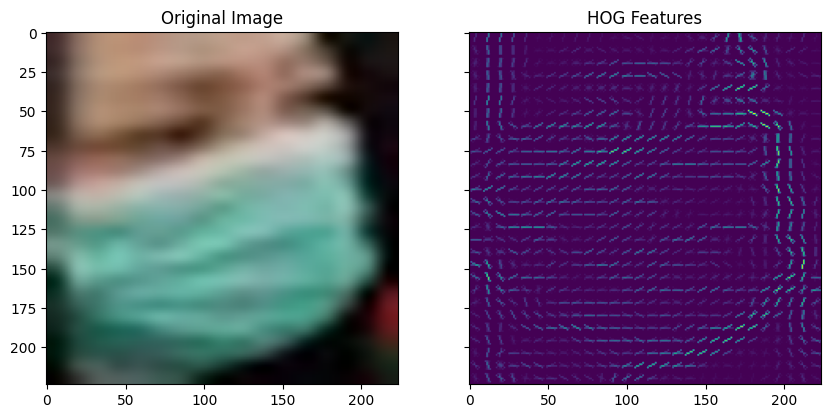

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog

# Choose some sample images from the test data
sample_images = X_test[:5]

# Set HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)

# Loop through sample images and plot HOG features
for i in range(len(sample_images)):
    # Compute HOG features for the current image
    hog_features, hog_image = hog(sample_images[i], orientations=orientations,
                                  pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block,
                                  visualize=True, multichannel=True, channel_axis=2)

    # Plot original image and HOG features
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
    ax1.imshow(sample_images[i])
    ax1.set_title('Original Image')
    ax2.imshow(hog_image)
    ax2.set_title('HOG Features')
    plt.show()

This code helps to generate and plot the Histogram of Oriented Gradients (HOG) features for sample images from the test dataset. The code makes use of the skimage.feature module to calculate HOG features using selected parameters such as the number of orientations, pixels per cell, and cells per block. Subsequently, the code displays each sample image's original image and the corresponding HOG features. This visualisation of HOG features helps us understand how they are extracted from a photo and how a machine learning algorithm can use them to make predictions.

# HOG + SVM

In [ ]:
# ======== TIME :: 4min 27sec
# ======== TIME ON COLLAB = 6 min
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extract HOG features from training data
hog_train = []
for img in X_train:
    hog_train.append(hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), channel_axis=-1))

# Extract HOG features from test data
hog_test = []
for img in X_test:
    hog_test.append(hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), channel_axis=-1))

# Load training and testing data for all three classes
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))

# Extract HOG features from all data
hog_all = []
for img in X_all:
    hog_all.append(hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), channel_axis=-1))

# Train SVM classifier with best hyperparameters (This was found using a GridSearchCV)
clf = SVC(kernel='rbf', C=0.1, gamma=0.1)
clf.fit(hog_train, y_train)

# Predict on test data
y_pred = clf.predict(hog_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy:  0.8471615720524017

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.85      1.00      0.92       388
           2       0.00      0.00      0.00        19

    accuracy                           0.85       458
   macro avg       0.28      0.33      0.31       458
weighted avg       0.72      0.85      0.78       458

Confusion Matrix:

[[  0  51   0]
 [  0 388   0]
 [  0  19   0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The code above extracts Histogram of Oriented Gradient (HOG) features from images in a dataset using the scikit-image library. It then uses these features to train a Support Vector Machine (SVM) classifier and evaluates its performance on a test set. The extracted HOG features are also stored for all the data in the dataset for further analysis. The classifier's accuracy score, classification report, and confusion matrix are printed to provide insight into the model's performance. This code helps understand the effectiveness of the SVM classifier with the HOG features extracted from images in the dataset.

# HOG + MLP

In [ ]:
# TIME == 1 MIN
from skimage.feature import hog
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define a function to extract HOG features from images
def extract_hog_features(images):
    hog_features = []
    for image in images:
        if image.ndim == 2:
            hog_feature = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
        else:
            hog_feature = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
        hog_features.append(hog_feature)
    return np.array(hog_features)


# Extract HOG features from the training and testing images
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Standardise the data
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Train an MLP model with hyperparameter tuning
mlp = MLPClassifier(max_iter=500, random_state=42, early_stopping=True)
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_hog, y_train)

# Evaluate the best model on the testing set
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_hog)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)




<ipython-input-18-dc733ae19bb3>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)


Best hyperparameters: {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant'}
Accuracy: 0.8624454148471615
Precision: 0.8666134811331317
Recall: 0.8624454148471615
F1 score: 0.8604566219096814
Confusion matrix:
 [[ 30  20   1]
 [ 28 359   1]
 [  2  11   6]]


This code extracts Histogram of Oriented Gradient (HOG) features from images in the training and testing datasets, standardises the data, and trains a Multilayer Perceptron (MLP) model using hyperparameter tuning. The code then evaluates the best model on the testing set and prints the model's hyperparameters, accuracy, precision, recall, F1 score, and confusion matrix. HOG features are widely used in computer vision for object detection and recognition tasks, while MLP is a popular neural network architecture for classification tasks. The code uses a grid search cross-validation method to tune the hyperparameters, which include hidden layer sizes, alpha, and learning rate.

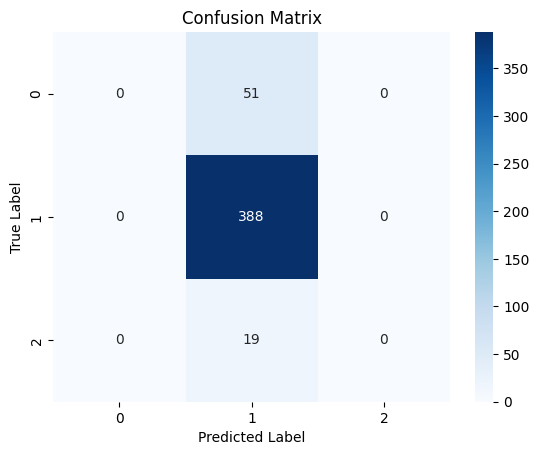

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['0', '1', '2']

# Create a heatmap of the confusion matrix using seaborn
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)

# Set axis labels and title
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Display the plot
plt.show()



This code creates a heatmap to visualise the confusion matrix of a machine learning model. The heatmap displays the count of true positives, false positives, true negatives, and false negatives predictions for each class. A confusion matrix is useful for evaluating the model's performance, allowing for a detailed examnation of its true and false positive and negative predictions

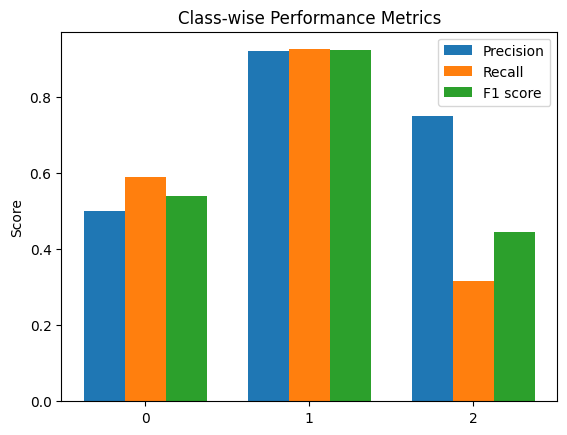

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_pred, average=None, labels=[0, 1, 2])
recall = recall_score(y_test, y_pred, average=None, labels=[0, 1, 2])
f1 = f1_score(y_test, y_pred, average=None, labels=[0, 1, 2])

# Create bar chart
classes = np.arange(3)
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(classes - width, precision, width, label='Precision')
rects2 = ax.bar(classes, recall, width, label='Recall')
rects3 = ax.bar(classes + width, f1, width, label='F1 score')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Class-wise Performance Metrics')
ax.set_xticks(classes)
ax.set_xticklabels(['0', '1', '2'])
ax.legend()

# Display the plot
plt.show()

This code calculates precision, recall, and F1 scores for each classification task class and visualises them using a bar chart.The plot can help evaluate the performance of a machine learning model by showing the precision, recall, and F1 score for each class.

<ipython-input-9-dc733ae19bb3>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)


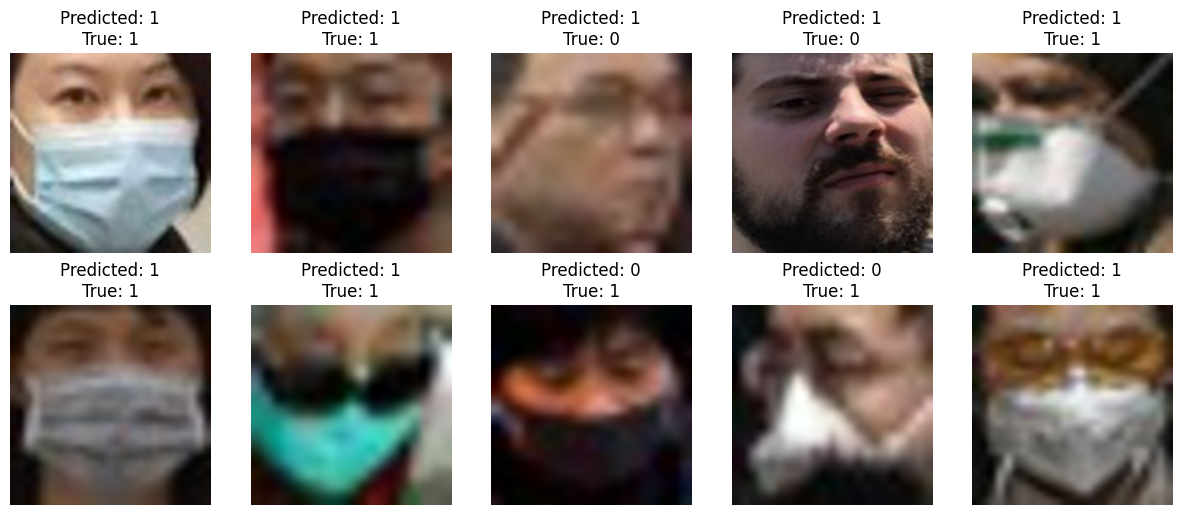

In [ ]:
import matplotlib.pyplot as plt
import random

# Choose 10 random test images
random.seed(42)
indices = random.sample(range(len(X_test)), 10)
images = X_test[indices]
labels = y_test[indices]

# Extract HOG features from the test images
test_hog = extract_hog_features(images)

# Standardize the data
test_hog = scaler.transform(test_hog)

# Predict the labels using the trained model
pred_labels = best_mlp.predict(test_hog)

# Display the images and their predicted labels
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap='gray')
    axi.set_title(f"Predicted: {pred_labels[i]}\nTrue: {labels[i]}")
    axi.axis('off')

plt.show()


This code randomly selects 10 images from the test set, extracts their Histogram of Oriented Gradient (HOG) features, standardises the data, predicts their labels using a trained model and displays the images along with their predicted and true labels in a 2x5 grid. The purpose of this code is to visually evaluate how well the model performs on unseen test data.

# kNN + HOG

In [ ]:
# TIME === 1 MIN

import numpy as np
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Extract HOG features from training data
hog_train = []
for img in X_train:
    hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
    hog_train.append(hog_feature)

# Extract HOG features from test data
hog_test = []
for img in X_test:
    hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
    hog_test.append(hog_feature)

# Load training and testing data for all three classes
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))

# Extract HOG features from all data
hog_all = []
for img in X_all:
    hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
    hog_all.append(hog_feature)

# Find best k value using grid search
k_values = {'n_neighbors': [1, 3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, k_values, cv=5, verbose=3)
grid_search.fit(hog_train, y_train)
print("Best k value: ", grid_search.best_params_['n_neighbors'])

# Train KNN classifier with best k value
clf_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
clf_knn.fit(hog_train, y_train)

# Predict on test data
y_pred = clf_knn.predict(hog_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Print f1score, precision, and recall
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))



<ipython-input-21-98679fd6afe3>:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
<ipython-input-21-98679fd6afe3>:18: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
<ipython-input-21-98679fd6afe3>:28: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.862 total time=   0.5s
[CV 2/5] END .....................n_neighbors=1;, score=0.852 total time=   0.1s
[CV 3/5] END .....................n_neighbors=1;, score=0.833 total time=   0.1s
[CV 4/5] END .....................n_neighbors=1;, score=0.852 total time=   0.1s
[CV 5/5] END .....................n_neighbors=1;, score=0.816 total time=   0.2s
[CV 1/5] END .....................n_neighbors=3;, score=0.864 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3;, score=0.856 total time=   0.2s
[CV 3/5] END .....................n_neighbors=3;, score=0.837 total time=   0.1s
[CV 4/5] END .....................n_neighbors=3;, score=0.860 total time=   0.2s
[CV 5/5] END .....................n_neighbors=3;, score=0.816 total time=   0.2s
[CV 1/5] END .....................n_neighbors=5;, score=0.856 total time=   0.3s
[CV 2/5] END .....................n_neighbors=5;,

This code uses Histogram of Oriented Gradient (HOG) features to train and evaluate a K-Nearest Neighbors (KNN) classifier. HOG features are extracted from the training and testing images, and a grid search is performed to determine the best value of k for KNN using cross-validation. The KNN classifier is then trained with the best k value and evaluated on the test set. The accuracy, f1 score, precision, and recall of the classifier are calculated and printed along with the confusion matrix to assess its performance.

In [ ]:
#Around 1 min
import numpy as np
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Extract HOG features from training data
hog_train = []
for img in X_train:
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualize=False, multichannel=True, channel_axis=2)
    hog_train.append(hog_feature)

# Extract HOG features from test data
hog_test = []
for img in X_test:
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualize=False, multichannel=True, channel_axis=2)
    hog_test.append(hog_feature)


# Train KNN classifier with best k value
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(hog_train, y_train)

# Predict on test data
y_pred = clf_knn.predict(hog_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Print f1score, precision, and recall
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

<ipython-input-22-2695ad3d86f2>:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
<ipython-input-22-2695ad3d86f2>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)


Accuracy:  0.8602620087336245
Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.29      0.37        51
           1       0.89      0.97      0.93       388
           2       1.00      0.05      0.10        19

    accuracy                           0.86       458
   macro avg       0.79      0.44      0.46       458
weighted avg       0.85      0.86      0.83       458

Confusion Matrix:

[[ 15  36   0]
 [ 10 378   0]
 [  6  12   1]]


HOG features are extracted from both the training and test images using the skimage.feature.hog() function. Then, a KNN classifier is trained on the extracted features with k=5 (best hyperparameter), the number of nearest neighbours to be considered for classification.

<ipython-input-23-68c4106a358e>:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)


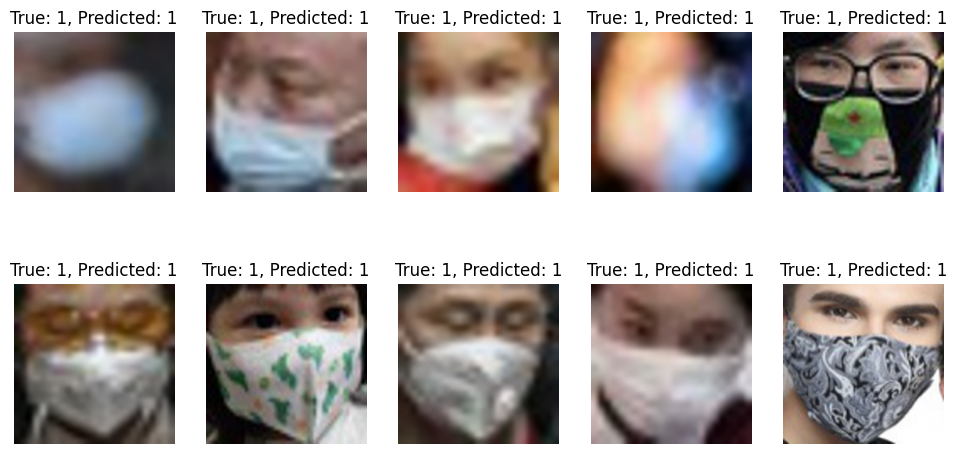

In [ ]:
import matplotlib.pyplot as plt
import random

# Select 10 random samples from the test set
random_indices = random.sample(range(len(X_test)), 10)
samples = X_test[random_indices]
true_labels = y_test[random_indices]

# Extract HOG features from the samples
hog_samples = []
for img in samples:
    hog_feature = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)
    hog_samples.append(hog_feature)

# Predict the class of each sample
predicted_labels = clf_knn.predict(hog_samples)

# Display the images and predicted classes
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(samples[i])
    ax.axis('off')
    ax.set_title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
plt.show()


This code randomly selects 10 samples from the test set, extracts Histogram of Oriented Gradient (HOG) features from the images, and uses a pre-trained K-Nearest Neighbors (KNN) classifier to predict their class labels. Then, it displays the selected images along with their true and predicted labels. The visualization of the predicted labels helps to understand how well the model is performing.

# CNN

In [ ]:
# 12 MIN to run
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

# Normalize the data
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# One-hot encode the labels
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Create the CNN model with reduced capacity
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model with reduced batch size
history = model.fit(X_train_normalized, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_normalized, y_test_one_hot))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_normalized, y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc)

# Calculate F1 score, recall, precision, and confusion matrix
y_pred = np.argmax(model.predict(X_test_normalized), axis=-1)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nF1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)
print("Confusion Matrix:\n", conf_matrix)


Epoch 1/10
75/75 [==============================] - 140s 2s/step - loss: 0.3584 - accuracy: 0.8851 - val_loss: 0.2666 - val_accuracy: 0.8908
Epoch 2/10
75/75 [==============================] - 133s 2s/step - loss: 0.2095 - accuracy: 0.9407 - val_loss: 0.2169 - val_accuracy: 0.9345
Epoch 3/10
75/75 [==============================] - 133s 2s/step - loss: 0.1804 - accuracy: 0.9461 - val_loss: 0.1931 - val_accuracy: 0.9323
Epoch 4/10
75/75 [==============================] - 133s 2s/step - loss: 0.1600 - accuracy: 0.9457 - val_loss: 0.1636 - val_accuracy: 0.9389
Epoch 5/10
75/75 [==============================] - 137s 2s/step - loss: 0.1426 - accuracy: 0.9515 - val_loss: 0.1683 - val_accuracy: 0.9258
Epoch 6/10
75/75 [==============================] - 134s 2s/step - loss: 0.1394 - accuracy: 0.9507 - val_loss: 0.1716 - val_accuracy: 0.9236
Epoch 7/10
75/75 [==============================] - 135s 2s/step - loss: 0.1314 - accuracy: 0.9570 - val_loss: 0.1857 - val_accuracy: 0.9323
Epoch 8/10
75

This is the last machine learning model that uses Convolutional Neural Network (CNN) to classify images.

The images are first normalised, and then the labels are one-hot encoded. A CNN model is created with reduced capacity, consisting of 3 convolutional layers and two max-pooling layers, followed by two fully connected layers (This was done to ensure it can run on a CPU). The model is compiled using the Adam optimiser and categorical cross-entropy loss function.

The model is then trained on the training data with reduced batch size and for a fixed number of epochs. The test accuracy is evaluated, and metrics such as F1 score, recall, precision, and confusion matrix are calculated to assess the model's performance.

Finally, the metrics are printed. The F1 score measures the model's accuracy in terms of precision and recall, while the confusion matrix shows how many images are correctly and incorrectly classified for each class.


15/15 [==============================] - 9s 550ms/step


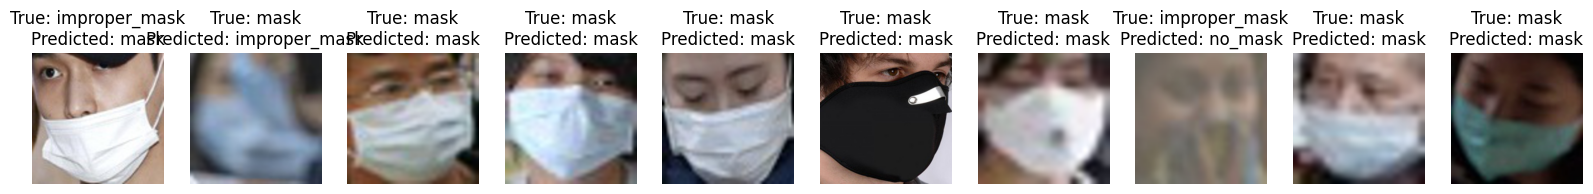

In [ ]:
import matplotlib.pyplot as plt

# Define the function to display images and their predicted classes
def display_images(images, true_labels, pred_labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.ravel()

    for i in np.arange(0, num_images):
        axes[i].imshow(images[i])
        axes[i].set_title("True: {}\nPredicted: {}".format(true_labels[i], pred_labels[i]), fontsize=12)
        plt.subplots_adjust(hspace=0.5)
        axes[i].axis('off')

    plt.show()

# Get the predicted class labels
y_pred = np.argmax(model.predict(X_test_normalized), axis=-1)

# Define the class names
class_names = {0: "no_mask", 1: "mask", 2: "improper_mask"}

# Get the class names for true and predicted labels
y_test_names = [class_names[label] for label in y_test]
y_pred_names = [class_names[label] for label in y_pred]

# Display images along with their true and predicted classes
display_images(X_test, y_test_names, y_pred_names, num_images=10)


This code displays 10 images and their predicted classes. The predicted labels were obtained using a machine learning model (CNN) that was trained to classify images into three categories: no_mask, mask, or improper_mask.

# Mask Detection Function

1/1 [==============================] - 0s 78ms/step


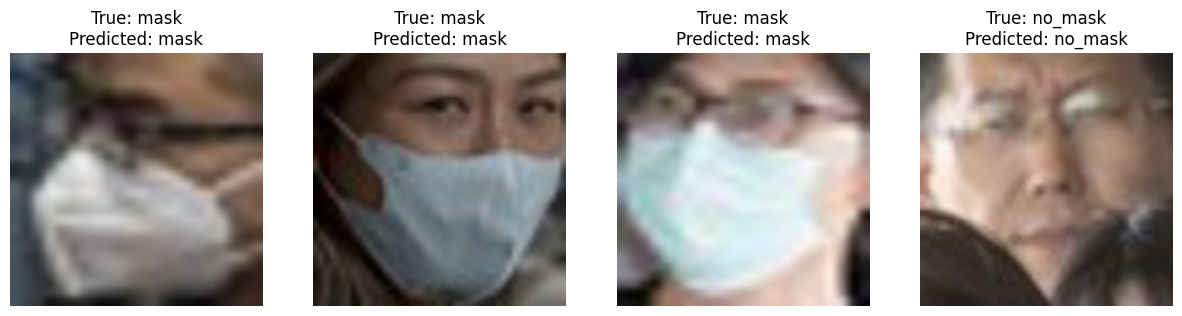

In [ ]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import hog

# NOTE ::
# This function is not the only one for detecting masks and it's only the initial version.

# Models dictionary
models = {
    "svm": clf,
    "mlp": best_mlp,
    "knn": clf_knn,
    "cnn": model
}

# Function to extract HOG features from an image
def extract_hog_features(image):
    return hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True, channel_axis=2)

# Mask Detection function
def MaskDetection(path_to_testset, model_type):
    model = models[model_type]
    test_images_path = os.path.join(path_to_testset, "images")
    test_labels_path = os.path.join(path_to_testset, "labels")
    test_files = os.listdir(test_images_path)

    # Load 4 random images from the test set
    random_files = random.sample(test_files, 4)
    images = []
    labels = []
    for filename in random_files:
        img = Image.open(os.path.join(test_images_path, filename))
        img = img.resize((224, 224))
        img_arr = np.array(img)
        images.append(img_arr)

        label_filename = os.path.splitext(filename)[0] + '.txt'
        label_file_path = os.path.join(test_labels_path, label_filename)
        with open(label_file_path, 'r') as f:
            text = f.read().strip()
            label = int(text)
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    # Make predictions
    if model_type == "cnn":
        predictions = np.argmax(model.predict(images / 255.0), axis=-1)
    else:
        images_hog = [extract_hog_features(img) for img in images]
        predictions = model.predict(images_hog)

    # Display images with predictions and ground-truth labels
    class_names = {0: "no_mask", 1: "mask", 2: "improper_mask"}
    true_labels = [class_names[label] for label in labels]
    pred_labels = [class_names[pred] for pred in predictions]

    fig, axes = plt.subplots(1, 4, figsize=(15, 15))
    axes = axes.ravel()

    for i in range(4):
        axes[i].imshow(images[i])
        axes[i].set_title(f"True: {true_labels[i]}\nPredicted: {pred_labels[i]}", fontsize=12)
        axes[i].axis('off')

    plt.show()

# Example usage
path_to_testset = "/content/drive/MyDrive/CW_Folder_UG/CW_Dataset/test"
model_type = "cnn"  # Available options: "svm", "mlp", "knn", "cnn"
MaskDetection(path_to_testset, model_type)
